In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import matplotlib.patches as mpatches

In [60]:
data_train = pd.read_csv('zip.train.txt', header = None,delimiter = " ")
data_test = pd.read_csv('zip.test.txt',header = None,delimiter=" ")
data_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,NaN


In [61]:
data_train_filter = data_train[data_train.iloc[:, 0].isin([1,4])]
data_test_filter = data_test[data_test.iloc[:, 0].isin([1,4])]


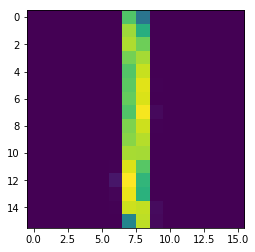

In [62]:
sample1 = np.array(data_train_filter.iloc[4, :])
sample1 = sample1[1:257].reshape((16,16))
plt.imshow(sample1)
plt.show()

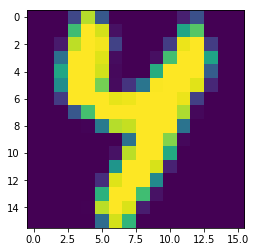

In [63]:
sample2 = np.array(data_test_filter.iloc[2, :])
sample2 = sample2[1:257].reshape((16,16))
plt.imshow(sample2)
plt.show()

In [64]:
def condition(df):
    temp = np.array(df.iloc[1:257])
    temp = temp.reshape((16,16))
    temp2 = temp[:,::-1]
    
    temp3 = (temp2-temp)
    return (16 * 16 - np.count_nonzero(temp3))/(16*16.0)
def classify(df):
    if(df.iloc[0] == 1):
        return 1
    else:
        return 0
def sum1(df):
    return df.iloc[1:257].sum()/(16*16)
data_train_filter['symmetry'] = data_train_filter.apply(condition,axis=1)
data_train_filter['intensity'] = data_train_filter.apply(sum1, axis=1)
data_train_filter["class"] = data_train_filter.apply(classify,axis = 1)
data_train_filter.head()

/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,symmetry,intensity,class
2,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,...,1.0,-0.179,-1.0,-1.0,-1.0,-1.0,NaN,0.507812,-0.537996,0
7,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.510,-0.213,...,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,0.757812,-0.753914,1
9,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.909,0.801,...,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,0.750000,-0.772281,1
12,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998,0.613,-0.385,...,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,0.750000,-0.769258,1
13,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.457,-0.219,...,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,0.789062,-0.795438,1


In [65]:
data_test_filter['symmetry'] = data_test_filter.apply(condition,axis=1)
data_test_filter['intensity'] = data_test_filter.apply(sum1, axis=1)
data_test_filter['class'] = data_test_filter.apply(classify,axis = 1)
data_test_filter.head()

/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,symmetry,intensity,class
13,4.0,-1.0,-1.0,-0.935,0.143,0.689,1.000,0.305,-1.000,-1.000,...,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0.406250,-0.569570,0
16,1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.586,0.693,1.000,...,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0.679688,-0.680133,1
22,4.0,-1.0,-1.0,-1.000,-0.577,0.774,-0.448,-1.000,-1.000,-1.000,...,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0.554688,-0.389664,0
42,1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,0.561,-0.264,...,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0.757812,-0.750781,1
45,1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.219,0.787,-0.333,...,-0.931,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0.757812,-0.561766,1


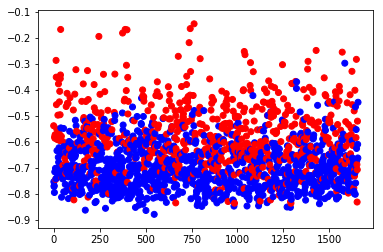

In [66]:
data_train_new = data_train_filter.iloc[:, 0:1]
data_train_new["symmetry"] = data_train_filter["symmetry"]
data_train_new["intensity"] = data_train_filter["intensity"]
data_train_new["class"] = data_train_filter["class"]

data_test_new = data_test_filter.iloc[:, 0:1]
data_test_new["symmetry"] = data_test_filter["symmetry"]
data_test_new["intensity"] = data_test_filter["intensity"]
data_test_new["class"] = data_test_filter["class"]

arr = np.arange(0,len(data_train_new))
colr = ['red' if l == 4 else 'blue' for l in data_train_new.iloc[:,0]]
plt.scatter(arr, data_train_new["intensity"],color = colr)

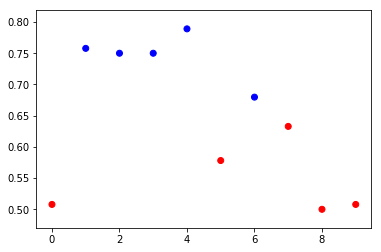

In [67]:

arr = np.arange(0,10)
colr = ['red' if l == 4 else 'blue' for l in data_train_new.iloc[:,0]]
y = data_train_new["symmetry"][:10]
plt.scatter(arr, y,color = colr)

In [68]:
x_train = np.array(data_train_new.loc[:,['intensity','symmetry']])
y_train = np.array(data_train_new["class"])

x_test = np.array(data_test_new.loc[:,['intensity','symmetry']])
y_test = np.array(data_test_new["class"])


In [69]:
# def sigmoid(output):
#     return (1/(1 + math.exp(-output)))

# def slopes(x,y,m1,m2,b):
#     x1 = np.array(x['intensity'])
#     x2 = np.array(x['symmetry'])
#     y1 = np.array(y)
#     t1,t2,t3 = 0,0,0
#     for i in range(len(x1)):
#         output = b + m1 * x1[i] + m2 * x2[i]
#         pred = sigmoid(output)
#         error = pred - y1[i]
#         t1 = t1 + error * x1[i]
#         t2 = t2 + error * x2[i]
#         t3 = t3 + error
        
#     s1 = t1/len(x1)
#     s2 = t2/len(x1)
#     s3 = t3/len(x1)
#     return s1,s2,s3
# def error(y_pred, y_actual):
#     return np.array((np.array(y_pred) - np.array(y_actual))**2).sum()/len(y_pred)

# def logistic_regression(x,y,epochs,lr):
#     m1,m2,b = 0,0,0
#     for i in range(epochs):
#         s1,s2,s3 = slopes(x,y,m1,m2,b)
#         m1 = m1 - lr * s1
#         m2 = m2 - lr * s2
#         b = b - lr * s3
#     return m1,m2,b


# def accuracy(y_pred,y_actual):
#     temp = np.array(y_pred - y_actual)
#     print(temp)
#     corr = len(y_pred) - np.count_nonzero(temp)
#     return float(corr)/len(y_pred)


# m1,m2,b = logistic_regression(x_train,y_train,10000,0.01)
# print("Weights = ",m1,m2,b)
# y_pred_feed = np.array(m1 * np.array(x_train['intensity']) + m2 * np.array(x_train['symmetry']) + b )
# y_pred = []
# for i in range(len(y_pred_feed)):
#     y_pred.append(sigmoid(y_pred_feed[i]))
# y_pred_feed

In [70]:
class LogisticRegression_new:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.theta = np.zeros(10)
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        loss = 0
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print("loss:" ,{loss} )
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

    def print_weights(self):
        print(self.theta)
def error(h,y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
model = LogisticRegression_new(lr=0.1, num_iter=1000)
model.fit(x_train,y_train)
preds = model.predict(x_test)
model.print_weights()
print("Score = ",(preds == y_test).mean())
print("Error = ",error(preds,y_test))

[-2.3403275  -0.92277164  3.41192225]
('Score = ', 0.8125)
('Error = ', nan)


/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


In [71]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
print("Weights = ",logisticRegr.coef_, logisticRegr.intercept_)
print("Score = ",logisticRegr.score(x_test,y_test))


('Weights = ', array([[ 0.44059972, 14.95407222]]), array([-9.19081357]))
('Score = ', 0.9439655172413793)


In [75]:
data_test_new['sym_3'] = data_test_new['symmetry']**3 
data_test_new['int_3'] = data_test_new['intensity']**3
data_test_new['int_2_sym'] = data_test_new['intensity']**2 * data_test_new['symmetry']
data_test_new['sym_2_int'] = data_test_new['symmetry']**2 * data_test_new['intensity']


In [76]:
data_train_new['sym_3'] = data_train_new['symmetry']**3 
data_train_new['int_3'] = data_train_new['intensity']**3
data_train_new['int_2_sym'] = data_train_new['intensity']**2 * data_train_new['symmetry']
data_train_new['sym_2_int'] = data_train_new['symmetry']**2 * data_train_new['intensity']


In [82]:
x_train = np.array(data_train_new.loc[:,['sym_3','int_3','int_2_sym','sym_2_int']])
y_train = np.array(data_train_new["class"])

x_test =np.array( data_test_new.loc[:,['sym_3','int_3','int_2_sym','sym_2_int']])
y_test = np.array(data_test_new["class"])


In [83]:
model2 = LogisticRegression_new(lr=0.1, num_iter=1000)
model2.fit(x_train,y_train)
preds = model2.predict(x_test)
model2.print_weights()
print("Score = ",(preds == y_test).mean())
print("Error = ",error(preds,y_test))

[-2.3266804   3.74622457 -0.89161901  1.80540046 -2.73896314]
('Score = ', 0.9094827586206896)
('Error = ', nan)


/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/uditi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


In [84]:
logisticRegr2 = LogisticRegression()
logisticRegr2.fit(x_train, y_train)
print("Weights = ",logisticRegr2.coef_, logisticRegr.intercept_)
print("Score = ",logisticRegr2.score(x_test,y_test))

('Weights = ', array([[11.77007406,  3.07617419,  1.71589611, -6.56934983]]), array([-9.19081357]))
('Score = ', 0.9547413793103449)
